# MLCC - Laboratory 3 - Dimensionality reduction and feature selection
In this laboratory we will address the problem of data analysis with a reference to a classification problem. 
Follow the instructions below.

In [1]:
# Import the 
from lab3ImpFunction import *


In [2]:
help(MixGauss)

Help on function MixGauss in module lab3ImpFunction:

MixGauss(means, sigmas, n)
    function [X, Y] = MixGauss(means, sigmas, n)
    
    means: (size dxp) and should be of the form [m1, ... ,mp] (each mi is
    d-dimensional)
    
    sigmas: (size px1) should be in the form [sigma_1;...; sigma_p]
    
    n: number of points per class
    
    X: obtained input data matrix (size 2n x d)
    Y: obtained output data vector (size 2n)
    
    EXAMPLE: X, Y = MixGauss(np.matrix([[0,1],[0,1]]),np.array([[0.5], [0.25]]),1000)
    generates a 2D dataset with two classes, the first one centered on (0,0)
    with standard deviation 0.5, the second one centered on (1,1)
    with standard deviation 0.25.
    Each class will contain 1000 points.
    
    to visualize: plt.scatter(X[:,1],X[:,2],s=25,c=Y)



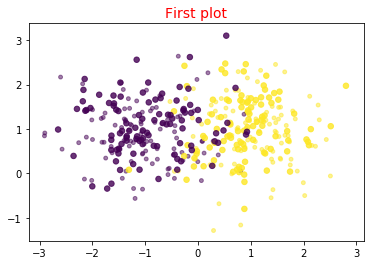

In [3]:
# main1
N = 100;
D = 30;

Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Yts[Yts==2] = -1;

plt.scatter(Xtr[:,0], Xtr[:,1], s=15, c=Ytr, alpha=0.5)
plt.scatter(Xts[:,0], Xts[:,1], s=30, c=Yts, alpha=0.8)
plt.title('First plot', fontsize=14, color='red')
plt.show()
# plt.title('First plot')

/home/suraj/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


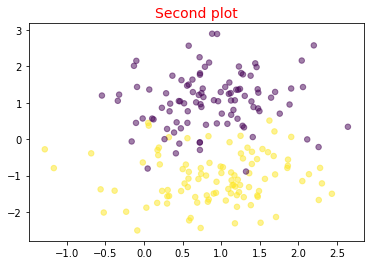

In [4]:
sigma_noise = 0.01;

Xtr_noise = sigma_noise * np.random.randn(2*N, D-2);
Xts_noise = sigma_noise * np.random.randn(2*N, D-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

V, d, X_proj = PCA(Xtr, 2)

plt.scatter(X_proj[:,0], X_proj[:,1], s=30, c=Ytr, alpha=0.5)
plt.title('Second plot', fontsize=14, color='red')
plt.show()

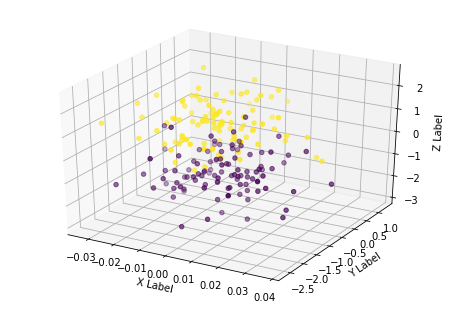

In [5]:
V, d, X_proj = PCA(Xtr, 3)

fig = pyplot.figure()
ax = Axes3D(fig)

x = X_proj[:,0].real
y = X_proj[:,1].real
z = X_proj[:,2].real

ax.scatter(x, y, z, c=Ytr, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

pyplot.show()

[ 1.27658822+0.j  1.12517757+0.j  0.01329885+0.j]


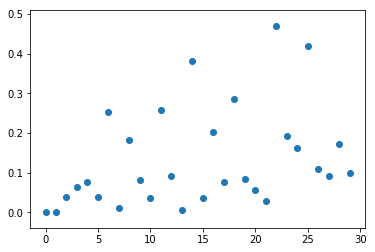

In [6]:
V, d, X_proj = PCA(Xtr, 3);
print(np.sqrt(d[:10]));

plt.scatter(list(range(D)), abs(V[:,0]))
plt.show()

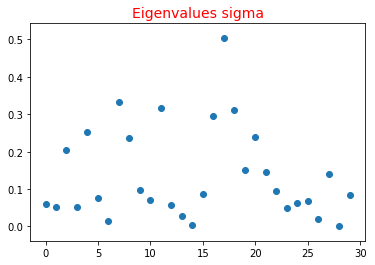

/home/suraj/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


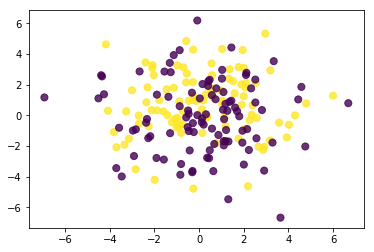

In [9]:
## Test on different sigma
Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Yts[Yts==2] = -1;

sigma_noise = [0, 0.01, 0.1, 0.5, 0.7, 1, 1.2, 1.4, 1.6, 2]

Xtr_noise = sigma_noise[9] * np.random.randn(2*N, D-2);

Xtr2 = np.concatenate((Xtr, Xtr_noise), axis=1)

V, d, X_proj = PCA(Xtr2, 10)

plt.scatter(list(range(D)), abs(V[:,0]));
plt.title('Eigenvalues sigma',fontsize=14, color='red')
plt.show()

plt.scatter(X_proj[:,1], X_proj[:,2], 50, Ytr, alpha=0.8);
plt.show()


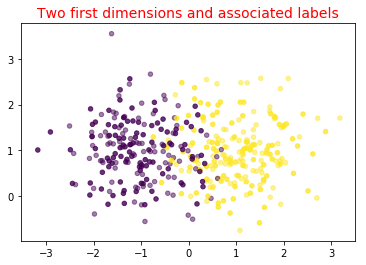

In [10]:
## main2

N = 100
D = 30

Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Yts[Yts==2] = -1;

plt.scatter(Xtr[:,0], Xtr[:,1], s=20, c=Ytr, alpha=0.5);
plt.scatter(Xts[:,0], Xts[:,1], s=20, c=Yts, alpha=0.8);
plt.title('Two first dimensions and associated labels', fontsize=14, color='red');
plt.show()

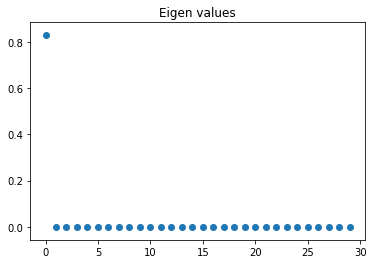

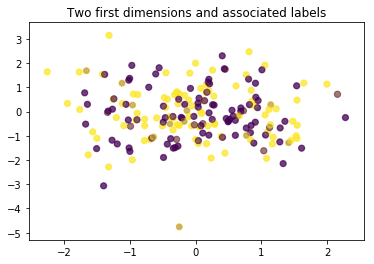

In [11]:
sigma_noise = 0.01;
Xtr_noise = sigma_noise * np.random.randn(2*N, D-2);
Xts_noise = sigma_noise * np.random.randn(2*N, D-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

# Normalize

m = np.mean(Xtr, axis=0)
s = np.std(Xtr, axis=0)

for i in range(2*N):
    Xtr[i, :] = Xtr[i, :] - m
    Xts[i, :] = Xts[i, :] - m
    
for i in range(2*N):
    Xtr[i, :] = Xtr[i, :] / s
    Xts[i, :] = Xts[i, :] / s
    
w, r, I = OMatchingPursuit(Xtr, Ytr, 2)

Ypred = np.sign(Xts.dot(w))

err = calcErr(Yts, Ypred);

plt.scatter(list(range(D)), abs(w))
plt.title('Eigen values');
plt.show()

plt.scatter(Xts[:,1], Xts[:,2], 30, Yts, alpha=0.5);
plt.scatter(Xts[:,1], Xts[:,2], 40, Ypred, alpha=0.5);
plt.title('Two first dimensions and associated labels', );
plt.show()    

rip         Iter        valErr      trErr       
0           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
0           2           0.066667    0.100000    
rip         Iter        valErr      trErr       
0           3           0.060000    0.120000    
rip         Iter        valErr      trErr       
0           4           0.093333    0.100000    
rip         Iter        valErr      trErr       
0           5           0.106667    0.080000    
rip         Iter        valErr      trErr       
0           6           0.120000    0.080000    
rip         Iter        valErr      trErr       
0           7           0.140000    0.040000    
rip         Iter        valErr      trErr       
0           8           0.126667    0.080000    
rip         Iter        valErr      trErr       
0           9           0.133333    0.080000    
rip         Iter        valErr      trErr       
0           10          0.153333    0.060000    
rip         Iter    

rip         Iter        valErr      trErr       
2           27          0.153333    0.000000    
rip         Iter        valErr      trErr       
2           28          0.153333    0.000000    
rip         Iter        valErr      trErr       
2           29          0.153333    0.000000    
rip         Iter        valErr      trErr       
2           30          0.153333    0.000000    
rip         Iter        valErr      trErr       
3           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
3           2           0.080000    0.060000    
rip         Iter        valErr      trErr       
3           3           0.080000    0.040000    
rip         Iter        valErr      trErr       
3           4           0.086667    0.020000    
rip         Iter        valErr      trErr       
3           5           0.093333    0.020000    
rip         Iter        valErr      trErr       
3           6           0.093333    0.020000    
rip         Iter    

rip         Iter        valErr      trErr       
5           23          0.186667    0.000000    
rip         Iter        valErr      trErr       
5           24          0.180000    0.000000    
rip         Iter        valErr      trErr       
5           25          0.193333    0.000000    
rip         Iter        valErr      trErr       
5           26          0.193333    0.000000    
rip         Iter        valErr      trErr       
5           27          0.200000    0.000000    
rip         Iter        valErr      trErr       
5           28          0.193333    0.000000    
rip         Iter        valErr      trErr       
5           29          0.193333    0.000000    
rip         Iter        valErr      trErr       
5           30          0.193333    0.000000    
rip         Iter        valErr      trErr       
6           1           1.000000    1.000000    
rip         Iter        valErr      trErr       
6           2           0.086667    0.040000    
rip         Iter    

rip         Iter        valErr      trErr       
8           20          0.146667    0.000000    
rip         Iter        valErr      trErr       
8           21          0.140000    0.000000    
rip         Iter        valErr      trErr       
8           22          0.146667    0.000000    
rip         Iter        valErr      trErr       
8           23          0.140000    0.000000    
rip         Iter        valErr      trErr       
8           24          0.133333    0.000000    
rip         Iter        valErr      trErr       
8           25          0.133333    0.000000    
rip         Iter        valErr      trErr       
8           26          0.133333    0.000000    
rip         Iter        valErr      trErr       
8           27          0.153333    0.000000    
rip         Iter        valErr      trErr       
8           28          0.153333    0.000000    
rip         Iter        valErr      trErr       
8           29          0.153333    0.000000    
rip         Iter    

rip         Iter        valErr      trErr       
11          16          0.133333    0.000000    
rip         Iter        valErr      trErr       
11          17          0.133333    0.000000    
rip         Iter        valErr      trErr       
11          18          0.146667    0.000000    
rip         Iter        valErr      trErr       
11          19          0.146667    0.000000    
rip         Iter        valErr      trErr       
11          20          0.153333    0.000000    
rip         Iter        valErr      trErr       
11          21          0.140000    0.000000    
rip         Iter        valErr      trErr       
11          22          0.133333    0.000000    
rip         Iter        valErr      trErr       
11          23          0.146667    0.000000    
rip         Iter        valErr      trErr       
11          24          0.140000    0.000000    
rip         Iter        valErr      trErr       
11          25          0.140000    0.000000    
rip         Iter    

rip         Iter        valErr      trErr       
14          11          0.120000    0.000000    
rip         Iter        valErr      trErr       
14          12          0.120000    0.000000    
rip         Iter        valErr      trErr       
14          13          0.113333    0.000000    
rip         Iter        valErr      trErr       
14          14          0.126667    0.000000    
rip         Iter        valErr      trErr       
14          15          0.120000    0.000000    
rip         Iter        valErr      trErr       
14          16          0.106667    0.000000    
rip         Iter        valErr      trErr       
14          17          0.093333    0.000000    
rip         Iter        valErr      trErr       
14          18          0.106667    0.000000    
rip         Iter        valErr      trErr       
14          19          0.133333    0.000000    
rip         Iter        valErr      trErr       
14          20          0.133333    0.000000    
rip         Iter    

17          5           0.066667    0.040000    
rip         Iter        valErr      trErr       
17          6           0.073333    0.040000    
rip         Iter        valErr      trErr       
17          7           0.066667    0.020000    
rip         Iter        valErr      trErr       
17          8           0.073333    0.020000    
rip         Iter        valErr      trErr       
17          9           0.073333    0.020000    
rip         Iter        valErr      trErr       
17          10          0.073333    0.020000    
rip         Iter        valErr      trErr       
17          11          0.080000    0.020000    
rip         Iter        valErr      trErr       
17          12          0.093333    0.020000    
rip         Iter        valErr      trErr       
17          13          0.100000    0.020000    
rip         Iter        valErr      trErr       
17          14          0.086667    0.000000    
rip         Iter        valErr      trErr       
17          15      

rip         Iter        valErr      trErr       
19          30          0.200000    0.000000    


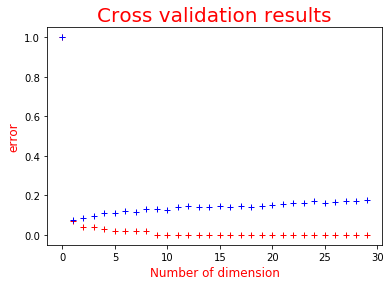

In [12]:
intIter = list(range(D))
perc = 0.75
nrip = 20
it, Vm, Vs, Tm, Ts = holdoutCVOMP(Xtr, Ytr, perc, nrip, intIter)


plt.plot(intIter, Tm, 'r+');

plt.plot(intIter, Vm, 'b+');

plt.title('Cross validation results', fontsize=20, color='red'); 

plt.xlabel('Number of dimension', fontsize=12, color='red'); 
plt.ylabel('error', fontsize=12, color='red');

plt.show()